<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

For this project, I am going to analyze the affect of state budgeting on student test performance. To do this I will be utilizing data provided for the ACT and SAT across states, in addition to budgeting information from the treasury of each state. I would hypothesize that a relative increase in spending in public school funding would cause an increase in students test performance.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def get_mean(num):
    x = 0
    for i in num:
        x = x + i
    return x/num

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def std_dev(nums):
    x = 0
    for i in nums:
        x = x + ((i - get_mean(nums)) ** 2)
    return ((x/nums)**0.5)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def clean_percent(x):
    return float(x.strip('%'))/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
df = pd.read_csv("data/act_2018.csv")
dftwo = pd.read_csv("data/act_2019.csv") 
dfsat = pd.read_csv("data/sat_2018.csv")
dfsattwo = pd.read_csv("data/sat_2019.csv") 
dfexp = pd.read_csv("data/expenditure.csv")

In [6]:
df.head()
dftwo.head()
dfsat.head()
dfsattwo.head()
dfexp.head()

,State,PerStudentSpending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [7]:
df.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [8]:
dftwo.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [9]:
dfsattwo.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [10]:
dfsat.head()


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [11]:
dfexp.head()

,State,PerStudentSpending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [12]:
dfexp.head()

,State,PerStudentSpending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [13]:
dfexp.dtypes

State                 object
PerStudentSpending     int64
dtype: object

In [14]:
df.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [15]:
dftwo.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [16]:
dfsat.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [17]:
dfsattwo.isnull().sum()

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [18]:
df["Composite"].max()

25.6

In [19]:
dftwo["Composite"].max()

25.5

In [20]:
dfsat["Total"].max()

1298

In [21]:
dfsattwo["Total"].max()

1284

In [22]:
df.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [23]:
dftwo.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [24]:
dfsat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [25]:
dfsattwo.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [26]:
df['Participation'] = df['Participation'].apply(clean_percent)

In [27]:
dftwo['Participation'] = dftwo['Participation'].apply(clean_percent)

In [28]:
dfsat['Participation'] = dfsat['Participation'].apply(clean_percent)

In [29]:
dfsat = dfsat.rename(columns={'evidence_based_reading_and_writing': 'ebrw'})

In [30]:
dfsattwo = dfsattwo.replace(to_replace =["—"],  
                            value = 0)

In [31]:
dfsattwo.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [32]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [33]:
dftwo.columns = dftwo.columns.str.replace(' ', '_')
dftwo.columns = dftwo.columns.str.lower()


In [34]:
dfsat.columns = dfsat.columns.str.replace(' ', '_')
dfsat.columns = dfsat.columns.str.replace('-', '_')
dfsat.columns = dfsat.columns.str.replace('evidence_based_reading_and_writing', 'ebrw')
dfsat.columns = dfsat.columns.str.lower()

In [35]:
dfsattwo.columns = dfsattwo.columns.str.lower()
dfsattwo.columns = dfsattwo.columns.str.replace(' ', '_')

In [36]:
dfsattwo['participation'] = df['participation'].astype(str).apply(lambda x: x.replace('-', '')).astype(str)

In [37]:
dfexp.columns = dfexp.columns.str.lower()
dfexp.head()

,state,perstudentspending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [38]:
###dfsattwo['participation'] = dfsattwo['participation'].apply(clean_percent)

In [39]:
dfsattwo['participation'].dtypes

dtype('O')

In [40]:
dfsattwo.isnull().sum()

state                 0
participation_rate    0
ebrw                  0
math                  0
total                 0
participation         1
dtype: int64

In [41]:
dfsattwo = dfsattwo.fillna(0)

In [42]:
dfsattwo = dfsattwo.drop(['participation_rate'], axis=1)

In [43]:
dfsat.drop(['math'], axis=1)

,state,participation,evidence_based_reading_and_writing,total
0,Alabama,0.06,595,1166
1,Alaska,0.43,562,1106
2,Arizona,0.29,577,1149
3,Arkansas,0.05,592,1169
4,California,0.60,540,1076
5,Colorado,1.00,519,1025
6,Connecticut,1.00,535,1053
7,Delaware,1.00,505,998
8,District of Columbia,0.92,497,977
9,Florida,0.56,550,1099


In [44]:
dfsat = dfsat.rename(columns={'evidence_based_reading_and_writing': 'ebrw'})

In [45]:
dfsat = dfsat.drop(['math', 'ebrw'], axis=1)

In [46]:
dfsat.head()

,state,participation,total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [47]:
dfsattwo.drop(['math'], axis=1)

,state,ebrw,total,participation
0,Alabama,583,1143,1.0
1,Alaska,556,1097,0.33
2,Arizona,569,1134,0.66
3,Arkansas,582,1141,1.0
4,California,534,1065,0.27
5,Colorado,518,1024,0.3
6,Connecticut,529,1046,0.26
7,Delaware,499,985,0.17
8,District of Columbia,495,975,0.32
9,Florida,516,999,0.66


In [48]:
#dfsattwo = dfsattwo.drop(['participation_rate'], axis=1)
#dfsattwo.head()

In [49]:
dfsattwo = dfsattwo.drop(['math', 'ebrw'], axis=1)
dfsattwo.head()

,state,total,participation
0,Alabama,1143,1.0
1,Alaska,1097,0.33
2,Arizona,1134,0.66
3,Arkansas,1141,1.0
4,California,1065,0.27


In [50]:
dfsattwo.dtypes

state            object
total             int64
participation    object
dtype: object

In [51]:
dfsattwo.astype({'participation': 'float32'}).dtypes

state             object
total              int64
participation    float32
dtype: object

In [52]:
df.head()

,state,participation,composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [53]:
dftwo.head()

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


In [54]:
dfsat.head()

,state,participation,total
0,Alabama,0.06,1166
1,Alaska,0.43,1106
2,Arizona,0.29,1149
3,Arkansas,0.05,1169
4,California,0.60,1076


In [55]:
dfsat.dtypes

state             object
participation    float64
total              int64
dtype: object

In [56]:
dfsat.astype({'participation': 'float32'}).dtypes

state             object
participation    float32
total              int64
dtype: object

In [57]:
dfsattwo.head()

,state,total,participation
0,Alabama,1143,1.0
1,Alaska,1097,0.33
2,Arizona,1134,0.66
3,Arkansas,1141,1.0
4,California,1065,0.27


In [58]:
dfexp.head()

,state,perstudentspending
0,Alabama,9696
1,Alaska,17726
2,Arizona,8239
3,Arkansas,10139
4,California,12498


In [59]:
df = df.join(dfexp['perstudentspending'])

In [60]:
df.head()

,state,participation,composite,perstudentspending
0,Alabama,1.00,19.1,9696.0
1,Alaska,0.33,20.8,17726.0
2,Arizona,0.66,19.2,8239.0
3,Arkansas,1.00,19.4,10139.0
4,California,0.27,22.7,12498.0


In [61]:
df.shape

(52, 4)

In [62]:
dftwo = dftwo.join(dfexp['perstudentspending'])
dfsat = dfsat.join(dfexp['perstudentspending'])
dfsattwo = dfsattwo.join(dfexp['perstudentspending'])

In [63]:
dfjoined = [df,dftwo]
dfact = pd.concat(dfjoined, keys=['2018 act', '2019 act'])
dfjoinedsat = [dfsat,dfsattwo]
dfsat = pd.concat(dfjoinedsat, keys=['2018 sat', '2019 sat'])


#dfjoined = pd.concat([df, dftwo, dfexp], ignore_index=True, sort=False)

In [64]:
#dfjoined

In [65]:
dfact.dtypes

state                  object
participation         float64
composite             float64
perstudentspending    float64
dtype: object

In [66]:
dfsat.dtypes

state                  object
participation          object
total                   int64
perstudentspending    float64
dtype: object

In [67]:
dfact.to_csv('cleanact.csv')

In [68]:
dfsat.to_csv('cleansat.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

# **To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|2018, 2019 ACT and SAT|The name of the state to which the test scores correspond|
|participation|float64|2018, 2019 ACT and SAT|The participation rate for test takers within the state|
|composite|float64|2018, 2019 ACT|The average score across all sections of the ACT within the state| 
|total|int64|2018, 2019 SAT|The average sum of the scores between both sections of the SAT within the state|
|perstudentspending|float64|2018, 2019 ACT and SAT|The investment by the state into education per student|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [69]:
dfact.describe()

,participation,composite,perstudentspending
count,104.000000,104.000000,102.000000
mean,0.596058,21.497115,12916.549020
std,0.342170,2.137708,3831.881488
min,0.060000,17.700000,7628.000000
25%,0.267500,19.800000,10089.500000
50%,0.585000,21.150000,11920.000000
75%,1.000000,23.725000,15539.750000
max,1.000000,25.600000,24040.000000


In [70]:
dfsat.describe()

,total,perstudentspending
count,104.000000,102.000000
mean,1113.144231,12916.549020
std,97.462307,3831.881488
min,935.000000,7628.000000
25%,1031.500000,10089.500000
50%,1097.000000,11920.000000
75%,1202.500000,15539.750000
max,1298.000000,24040.000000


In [71]:
dfact.sort_values(by='composite', ascending=False)

state  participation  composite  perstudentspending
2018 act 6      Connecticut           0.26       25.6             20635.0
2019 act 6      Connecticut           0.22       25.5             20635.0
2018 act 22   Massachusetts           0.25       25.5             12345.0
2019 act 21   Massachusetts           0.21       25.5             17058.0
2018 act 30   New Hampshire           0.16       25.1             20021.0
...                     ...            ...        ...                 ...
         25     Mississippi           1.00       18.6             10810.0
2019 act 24     Mississippi           1.00       18.4              8935.0
2018 act 41  South Carolina           1.00       18.3             10073.0
2019 act 28          Nevada           1.00       17.9              9417.0
2018 act 29          Nevada           1.00       17.7             16893.0

[104 rows x 4 columns]

In [72]:
dfsat.sort_values(by='total', ascending=False)

state participation  total  perstudentspending
2018 sat 23             Minnesota          0.04   1298             12975.0
         49             Wisconsin          0.03   1294             12285.0
2019 sat 23             Minnesota          0.22   1284             12975.0
         51             Wisconsin           1.0   1283                 NaN
2018 sat 34          North Dakota          0.02   1283             13758.0
...                           ...           ...    ...                 ...
2019 sat 8   District of Columbia          0.32    975             22759.0
         36              Oklahoma           1.0    963              8239.0
         39           Puerto Rico           0.2    944             16121.0
         50         West Virginia           1.0    943             16224.0
         47        Virgin Islands          0.24    935             12995.0

[104 rows x 4 columns]

In [76]:
dfsat.isnull().sum()

state                 0
participation         0
total                 0
perstudentspending    2
dtype: int64

In [77]:
dfact.isnull().sum()

state                 0
participation         0
composite             0
perstudentspending    2
dtype: int64

In [78]:
dfact.fillna(dfact['perstudentspending'].mean())
dfsat.fillna(dfsat['perstudentspending'].mean())

state participation  total  perstudentspending
2018 sat 0         Alabama          0.06   1166          9696.00000
         1          Alaska          0.43   1106         17726.00000
         2         Arizona          0.29   1149          8239.00000
         3        Arkansas          0.05   1169         10139.00000
         4      California           0.6   1076         12498.00000
...                    ...           ...    ...                 ...
2019 sat 48       Virginia          0.24   1119         11334.00000
         49     Washington          0.65   1074         12285.00000
         50  West Virginia           1.0    943         16224.00000
         51      Wisconsin           1.0   1283         12916.54902
         52        Wyoming             0   1238         12916.54902

[104 rows x 4 columns]

In [73]:
dfact.sort_values(by='participation', ascending=False)

state  participation  composite  perstudentspending
2018 act 0          Alabama           1.00       19.1              9696.0
         27         Montana           1.00       20.0             12491.0
         29          Nevada           1.00       17.7             16893.0
         34  North Carolina           1.00       19.1             13758.0
         36            Ohio           1.00       20.3              8239.0
...                     ...            ...        ...                 ...
2019 act 7         Delaware           0.13       24.1             15639.0
         39    Rhode Island           0.12       24.7             16121.0
2018 act 20           Maine           0.07       24.0             14762.0
         19           Maine           0.07       24.0             14145.0
2019 act 19           Maine           0.06       24.3             14145.0

[104 rows x 4 columns]

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [79]:
dfsat.head()

state participation  total  perstudentspending
2018 sat 0     Alabama          0.06   1166              9696.0
         1      Alaska          0.43   1106             17726.0
         2     Arizona          0.29   1149              8239.0
         3    Arkansas          0.05   1169             10139.0
         4  California           0.6   1076             12498.0

In [80]:
dfact.head()

state  participation  composite  perstudentspending
2018 act 0     Alabama           1.00       19.1              9696.0
         1      Alaska           0.33       20.8             17726.0
         2     Arizona           0.66       19.2              8239.0
         3    Arkansas           1.00       19.4             10139.0
         4  California           0.27       22.7             12498.0

In [81]:
dfsat["total"].corr(dfsat["perstudentspending"])

-0.20627623374673684

In [82]:
dfact["composite"].corr(dfact['perstudentspending'])

0.42402241769437427

In [93]:
dfsat['outperform'] = (dfsat['perstudentspending'] - dfsat['perstudentspending'].mean())

In [94]:
dfsat.head()

state participation  total  perstudentspending  outperform
2018 sat 0     Alabama          0.06   1166              9696.0 -3220.54902
         1      Alaska          0.43   1106             17726.0  4809.45098
         2     Arizona          0.29   1149              8239.0 -4677.54902
         3    Arkansas          0.05   1169             10139.0 -2777.54902
         4  California           0.6   1076             12498.0  -418.54902

In [95]:
dfact['outperform'] = (dfact['perstudentspending'] - dfact['perstudentspending'].mean())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7a97224c0>]],
      dtype=object)

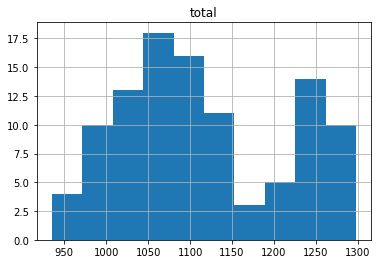

In [83]:
dfsat.hist(column='total')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7a9888370>,
      dtype=object)

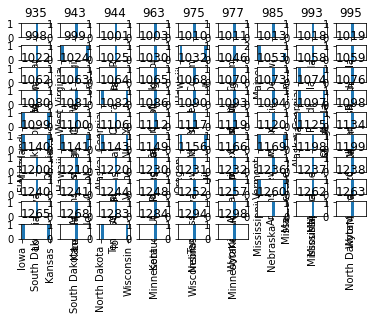

In [84]:
dfsat.hist(by='total',
       column='state')

In [85]:
dfsat.boxplot

<bound method boxplot_frame of                      state participation  total  perstudentspending
2018 sat 0         Alabama          0.06   1166              9696.0
         1          Alaska          0.43   1106             17726.0
         2         Arizona          0.29   1149              8239.0
         3        Arkansas          0.05   1169             10139.0
         4      California           0.6   1076             12498.0
...                    ...           ...    ...                 ...
2019 sat 48       Virginia          0.24   1119             11334.0
         49     Washington          0.65   1074             12285.0
         50  West Virginia           1.0    943             16224.0
         51      Wisconsin           1.0   1283                 NaN
         52        Wyoming             0   1238                 NaN

[104 rows x 4 columns]>

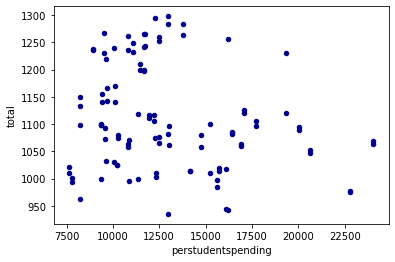

In [86]:
ax1 = dfsat.plot.scatter(x='perstudentspending',
                      y='total',
                      c='DarkBlue')

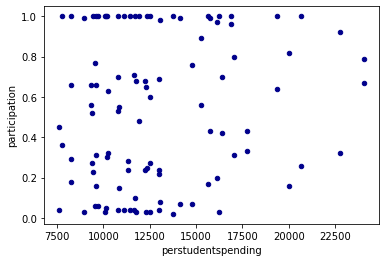

In [87]:
ax2 = dfsat.plot.scatter(x='perstudentspending',
                      y='participation',
                      c='DarkBlue')

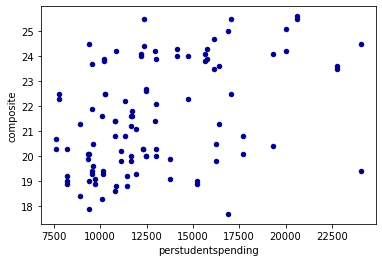

In [88]:
ax3 = dfact.plot.scatter(x='perstudentspending',
                      y='composite',
                      c='DarkBlue')

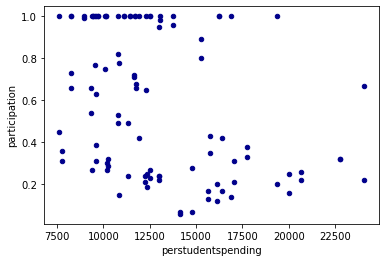

In [89]:
ax4 = dfact.plot.scatter(x='perstudentspending',
                        y='participation',
                        c='DarkBlue')

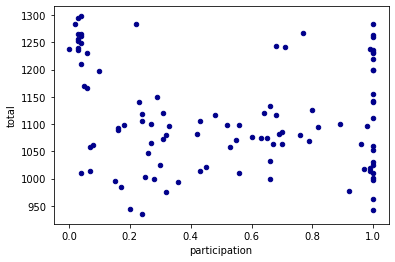

In [90]:
ax5 = dfsat.plot.scatter(x='participation',
                        y='total',
                        c='DarkBlue')

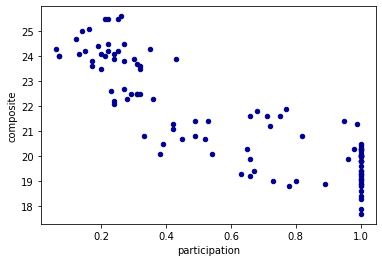

In [92]:
ax6 = dfact.plot.scatter(x='participation',
                        y='composite',
                        c='DarkBlue')

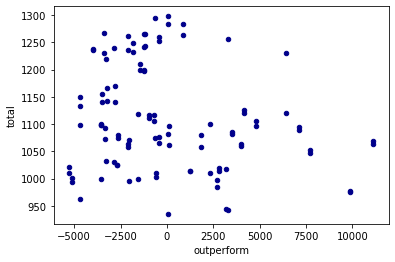

In [96]:
ax7 = dfsat.plot.scatter(x='outperform',
                        y='total',
                        c='DarkBlue')

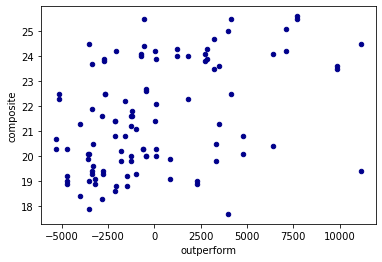

In [98]:
ax8 = dfact.plot.scatter(x='outperform',
                        y='composite',
                        c='DarkBlue')

In [100]:
dfsat.describe()

,total,perstudentspending,outperform
count,104.000000,102.000000,1.020000e+02
mean,1113.144231,12916.549020,4.993304e-13
std,97.462307,3831.881488,3.831881e+03
min,935.000000,7628.000000,-5.288549e+03
25%,1031.500000,10089.500000,-2.827049e+03
50%,1097.000000,11920.000000,-9.965490e+02
75%,1202.500000,15539.750000,2.623201e+03
max,1298.000000,24040.000000,1.112345e+04


In [101]:
dfact.describe()

,participation,composite,perstudentspending,outperform
count,104.000000,104.000000,102.000000,1.020000e+02
mean,0.596058,21.497115,12916.549020,4.993304e-13
std,0.342170,2.137708,3831.881488,3.831881e+03
min,0.060000,17.700000,7628.000000,-5.288549e+03
25%,0.267500,19.800000,10089.500000,-2.827049e+03
50%,0.585000,21.150000,11920.000000,-9.965490e+02
75%,1.000000,23.725000,15539.750000,2.623201e+03
max,1.000000,25.600000,24040.000000,1.112345e+04


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

In [ ]:
Surprisingly investment on a per student basis does not correlate with testing outcomes as heavily as I would have suspected.
The return on investment between the SAT and ACT is somewhat staggering, however, as the ACT outcomes do tend to increase
as state investment increases with a corellation score of around .4, compared to the negative correlation score between the SAT
and investment of around -.2. Out of surprise I attempted to see if I could explain this through diminishing returns on investment.
To do this I used an outperform feature which would just look at the difference between the states investment compared
to the national average. This did not correct anything, but did show that increased investment over the national average would
help ACT scores, while it would actually do nothing for SAT scores.
So what can we see from this data? Very little relationship between per student spending and participation, but even more 
astounding is the very clear negative relationship between participation and test outcomes. This could suggest that
students that are eager would take the tests anyway, and they are outperforming, but the students that otherwise would not take the test
but by mandate are underperforming. This could make a great deal of sense as there are many different expectations at an
individual level that might prohibit excellence on an exam. 
While it is difficult to examine such complex individual hurdles that might lead to lower performance there are some
shortcomings in my own data, as well. I was only able to get perstudentspending from a 2018 report, and since these scores are 
from 2018 and 2019, the data might be skewed. Additionally this perstudentspending is not specific to testing, it is generic
budget spending, with no sub-categories which might be more specific and valuable to a states budget planners. It might
be worth analyzing the differential in spending from a year-to-year basis and seeing that relationship to the testing outcomes.
My other recommendations would not necessarily be to stop enforcing testing mandates, as more participation is likely important
for the good of the individuals future and therefore the states. However, after careful consideration of alternate pathways
into careers, a state might consider that college entrance exams might not be necessary if there is a robust infrastructure
for careers outside of higher education. There is a lot more to look at, and purging the data of subcategories like the
individual components of the test scores might have warranted slightly different conclusions. Such as analyzing whether math scores
or verbal scores were indivudally affected by investment, moreso than the total. This could give us a future glimpse into whether
the subcategories of educational spending are worth a look.
Overall, this data does suggest that keeping up with the national average of per student spending is a worthy goal and one that will
ensure at the very least that the students are given adequate opportunities to test well, with the exception of if the state
is more focused on the ACT, as there is a moderate relationship between increased spending beyond the national average and 
student outcomes.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!